## RF linac example



In [2]:
from abel import *
import numpy as np
#%load_ext autoreload
#%autoreload 2

## Define the linac and beams

In [3]:
# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C] bunch charge (not train)
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.02
source.bunch_length = 18e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = 1
source.beta_y = source.beta_x
source.num_particles = 5000
source.num_bunches_in_train = 312
source.bunch_separation = 0.5e-9

beam = source.track()
print(beam.train_duration())
print(-beam.average_current_train())

1.555e-07
3.2043532679999993


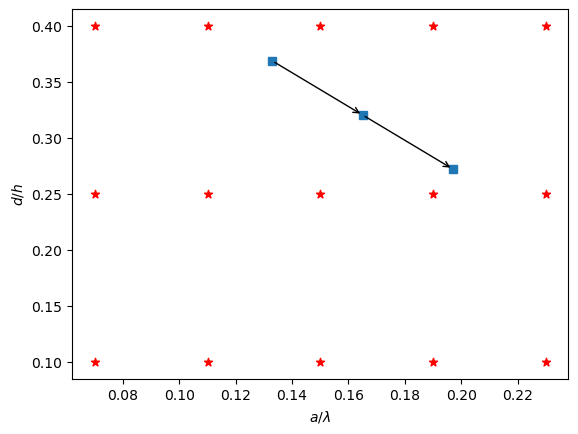

In [5]:
#Examples of RFAccelerators

#Multi structure linacs

#driverLinac = RFAccelerator_TW_CLICG()

driverLinac = RFAccelerator_TW_DB2()

#Set some linac parameters
driverLinac.length = 500
driverLinac.num_structures = 2500

#Set some common structure parameters
driverLinac.rf_frequency = 6.0e9
driverLinac.num_rf_cells = 50

#Set some specialized structure parameters
driverLinac.a_n *= 1.5
driverLinac.a_n_delta *= 2

driverLinac.d_n *= 2.0
driverLinac.d_n_delta *= -1.2

driverLinac.plot_database_points()

#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=100, f0_scaleto=6.0, length=500,num_structures=100, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)


#Single structure "linac"
#driverLinac = RFAccelerator_TW_CLICG(num_rf_cells=24, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=550)
#driverLinac = RFAccelerator_TW_CLIC502(num_rf_cells=25, f0_scaleto=3.0, length=None, num_structures=1, gradient=100e6, beam_pulse_length=100e-9, beam_current=1)




In [6]:

#Geometry only
print("Linac fill factor =", driverLinac.fill_factor)
print("Structure filling time = ", driverLinac.get_t_fill()*1e9, "[ns]")


Linac fill factor = 4.1637859171189415
Structure filling time =  92.29540331715612 [ns]


In [7]:
#Basic gradient/voltage information
driverLinac.gradient_structure = 100e6 #It will figure out the voltages from the geometry
print("Total voltage =", driverLinac.voltage_total/1e9, "[GV], per structure =", \
      driverLinac.voltage_structure/1e6, "[MV]")


Total voltage = 208.18929585594705 [GV], per structure = 83.27571834237882 [MV]


In [8]:
driverLinac.num_bunches_in_train = 1
print("Power per structure =", driverLinac.get_structure_power()/1e6, "[MW]")
#driverLinac.bunch_separation = 6/12e9 #6 buckets at 12 GHz
print("Beam Pulse Length =", driverLinac.train_duration, "[ns]")
driverLinac.bunch_charge = 1e-9 #[C]
print("Total RF->beam Efficiency =", driverLinac.get_RF_efficiency()*100, "[%] (single bunch)")
print("Energy per structure =", driverLinac.get_structure_pulse_energy(), "[J]")
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns] (beam current undefined)")
driverLinac.bunch_charge = 1e-9 #[C]
driverLinac.num_bunches_in_train = 2
driverLinac.bunch_separation = 6/12e9 #6 buckets at 12 GHz
print("Max pulse length =", driverLinac.get_pulse_length_max()*1e9, "[ns] @ beam_current=",driverLinac.average_current_train, "[A]")

Power per structure = 560.692099069643 [MW]
Beam Pulse Length = 0.0 [ns]
Total RF->beam Efficiency = 0.14336046150340204 [%] (single bunch)
Energy per structure = 58.088344212258725 [J]
Max pulse length = 0.0 [ns] (beam current undefined)
Max pulse length = 0.0 [ns] @ beam_current= 1.9999999999999998 [A]


## Let's do some tracking - this changes the beam settings in the driverLinac object!

Beam parameters in linac before tracking:
RF accelerator: Length=500.0[m], L_struct=833[mm], N=2500, fill=416.379[%], Egain=208.189 [GV], gradient_structure=100.0[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=2
Beam parameters in linac after tracking:
RF accelerator: Length=500.0[m], L_struct=833[mm], N=2500, fill=416.379[%], Egain=208.189 [GV], gradient_structure=100.0[MV/m], rf_frequency=6.000000000000001[GHz], bunch_charge=1.6021766339999998e-09[C], bunch_separation=5e-10[s], num_bunches_in_train=312


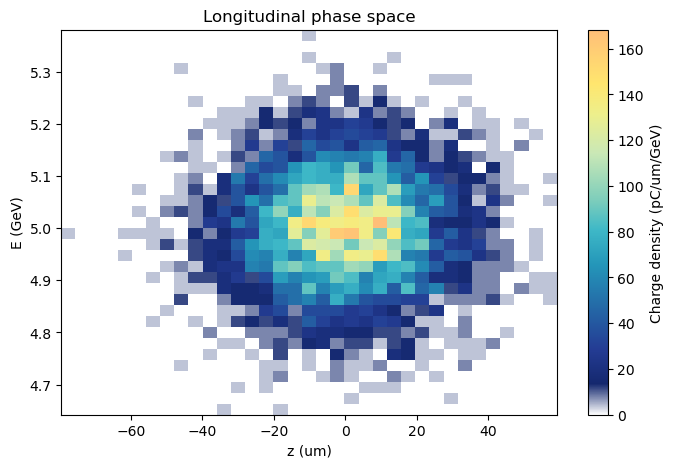

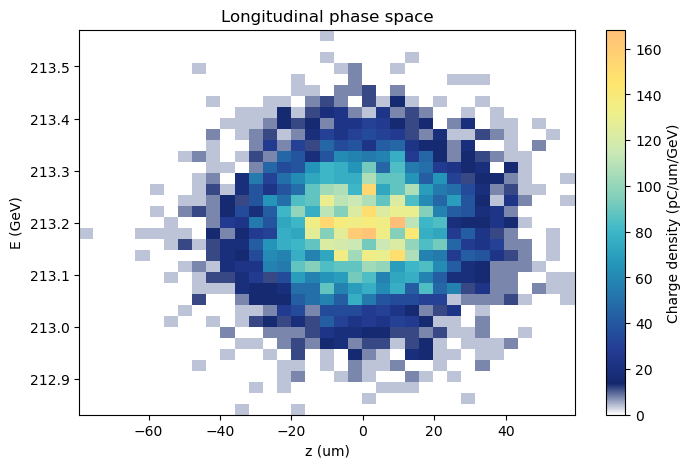

In [9]:
beam.plot_lps()

print("Beam parameters in linac before tracking:",)
print(driverLinac)

beam2 = driverLinac.track(beam)
beam2.plot_lps()

print("Beam parameters in linac after tracking:",)
print(driverLinac)


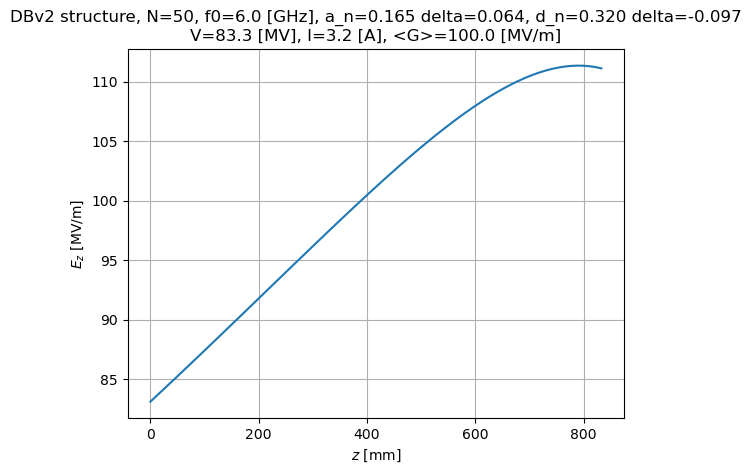

In [10]:
driverLinac.plot_gradient_profile()
plt.grid()

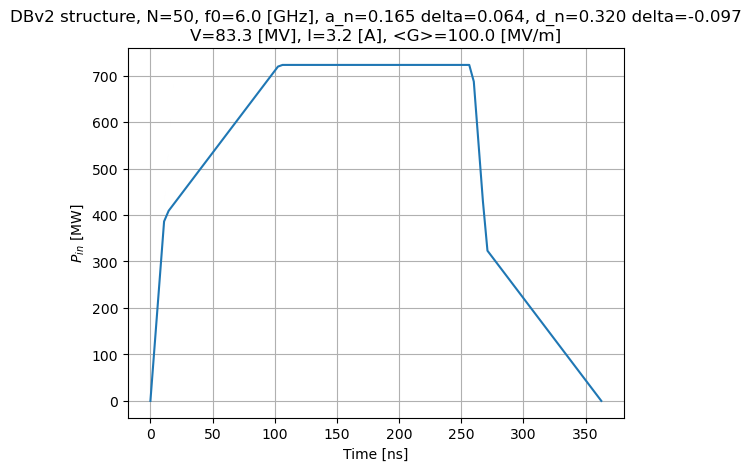

In [11]:
driverLinac.plot_power_profile()
plt.grid()
